<a href="https://colab.research.google.com/github/shreyashamrutam/Credit-Card-EDA/blob/main/Credit_Card_CS_(EDA_and_ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'predicting-credit-card-customer-attrition-with-m:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2814775%2F4855664%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240612%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240612T084616Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2f7f124d98098cacabbc00fd7a01d2c4e2e7d067ea25cb2dc07171c4a7c0917abe47f8362ec17e9c6a229356c68512b7762309dcdd71c18a2bfea8d2834ab56dec0a6a80e4edd72a0494ca936d6e0d3cf72d064f35f8f44e8d9c325f4b24cb5a3e7ad682b5b9583d7af858933099577b6890cbd61c6cccb6b031231c8ba6d29f16028aca1fb14f7e14c570e45373011e2c885b72bcfc14fdd6b73552ce9e03d215c5ac9a408b3bf64fb5d39f4042a84901f13bdde5330498305152b5a9199af2f957a81d7af85f4d742d2a9f86d3a06ea7c440d6c1a892f7f12b25874e1f60ea42e8af37cf223631feec019d9a473361851fd52adbcfc4bf0bbebf8cb02dfd47'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 387771 bytes downloaded
Downloaded and uncompressed: predicting-credit-card-customer-attrition-with-m
Data source import complete.



#### Metadata

* Column name ==>Description
* CLIENTNUM ==>Unique identifier for each customer. (Integer)
* Attrition_Flag ==>Flag indicating whether or not the customer has churned out. (Boolean)
* Customer_Age ==>Age of customer. (Integer)
* Gender ==>Gender of customer. (String)
* Dependent_count ==>Number of dependents that customer has. (Integer)
* Education_Level ==>Education level of customer. (String)
* Marital_Status ==>Marital status of customer. (String)
* Income_Category ==>Income category of customer. (String)
* Card_Category ==>Type of card held by customer. (String)
* Months_on_book ==>How long customer has been on the books. (Integer)
* Total_Relationship_Count ==>Total number of relationships customer has with the credit card provider. (Integer)
* Months_Inactive_12_mon ==>Number of months customer has been inactive in the last twelve months. (Integer)
* Contacts_Count_12_mon ==>Number of contacts customer has had in the last twelve months. (Integer)
* Credit_Limit ==>Credit limit of customer. (Integer)
* Total_Revolving_Bal ==>Total revolving balance of customer. (Integer)
* Avg_Open_To_Buy ==>Average open to buy ratio of customer. (Integer)
* Total_Amt_Chng_Q4_Q1 ==>Total amount changed from quarter 4 to quarter 1. (Integer)
* Total_Trans_Amt ==>Total transaction amount. (Integer)
* Total_Trans_Ct ==>Total transaction count. (Integer)
* Total_Ct_Chng_Q4_Q1 ==>Total count changed from quarter 4 to quarter 1. (Integer)
* Avg_Utilization_Ratio ==>Average utilization ratio of customer. (Integer)
* Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 ==>
* Naive Bayes classifier for predicting whether or not someone will churn based on characteristics such

In [35]:
# Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

# Algorithmes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


import warnings
warnings.filterwarnings('ignore')

# Data Wrangling

In [36]:
df=pd.read_csv('/kaggle/input/predicting-credit-card-customer-attrition-with-m/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [38]:
# check for duplication in the csv
df.duplicated().sum()

0

In [39]:
# last two columns are very tall so I summarized its renaming for better understanding
df.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'Naive_Bayes_mon_1',
                  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2':'Naive_Bayes_mon_2'},inplace=True)

In [40]:
df.drop(columns=['CLIENTNUM'],inplace=True)

#### there are no missing data and data are suitable

# Perform EDA (Exploratory Data Analysis)

In [41]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_mon_1,Naive_Bayes_mon_2
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [42]:
df.describe(include=['O'])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


**Now we see the relations different attributes**

#### Existing Customer VS Attrited Customer

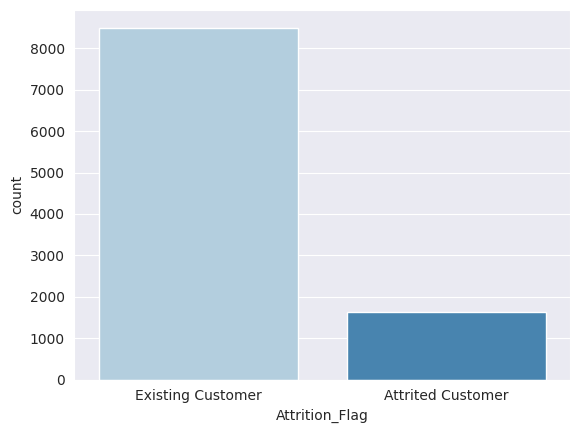

In [43]:
sns.countplot(x='Attrition_Flag',data=df,palette='Blues' );

#### Age of Customers

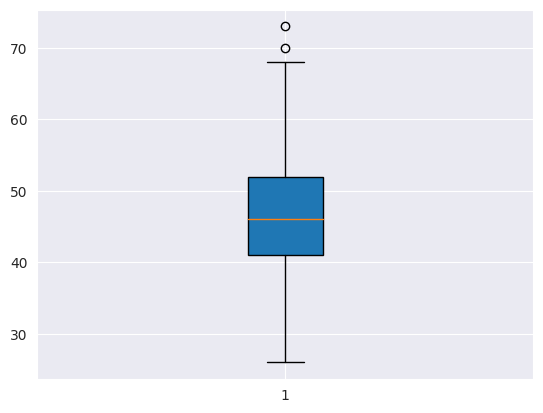

In [44]:
plt.boxplot(df['Customer_Age'],patch_artist=True);


##### I do not delete the tow values that close to 70 because it is not consider as outlier

#### Customers Gender and Marital Status

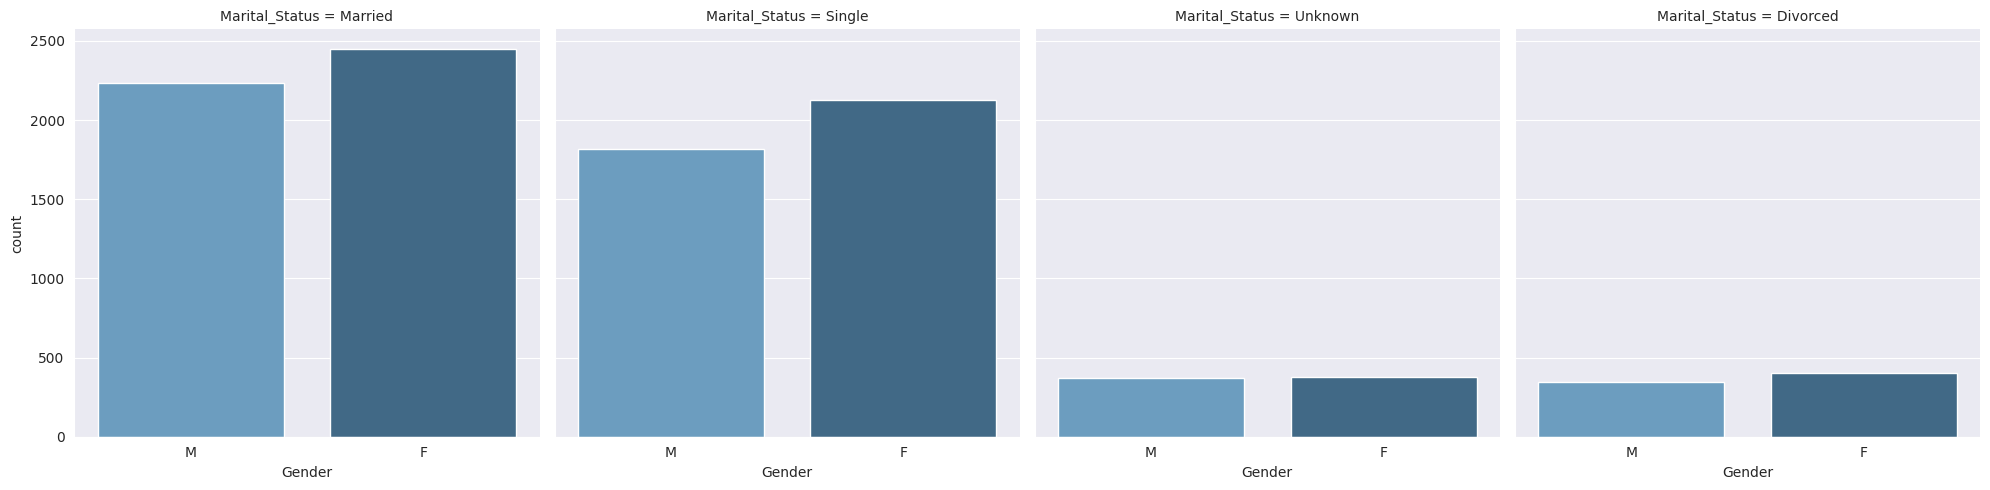

In [45]:
sns.catplot(x='Gender',data=df,palette='Blues_d',kind='count',col='Marital_Status');

#### What is education level of Customers ?

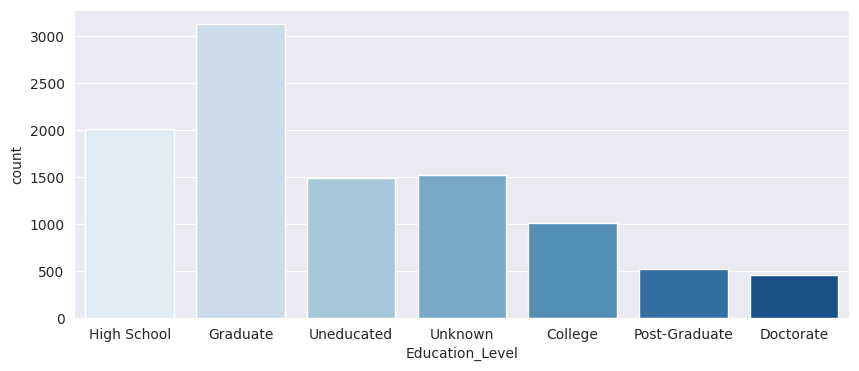

In [46]:
plt.figure(figsize=(10,4))
sns.countplot(x='Education_Level',data=df,palette='Blues');

#### Here, most customers are Graduated so we should focus on them

#### There is a relation between (attrition or existing) Customers and their income?

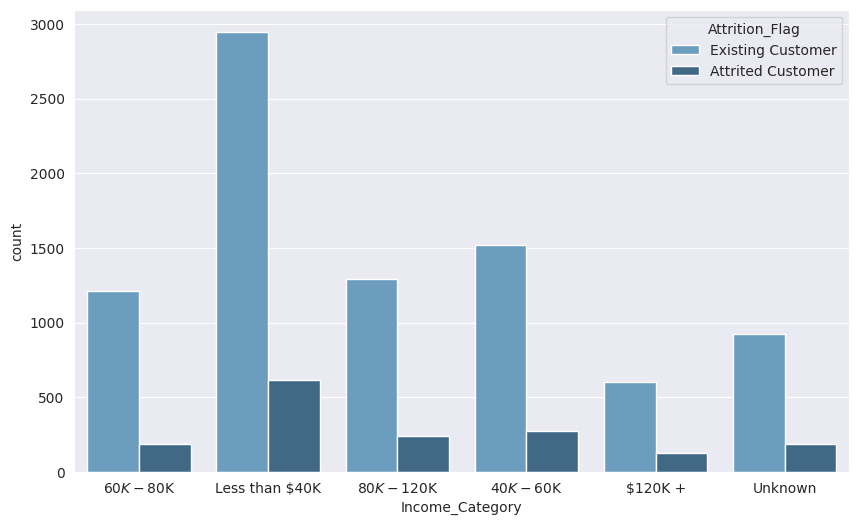

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(x='Income_Category',data=df,palette='Blues_d',hue='Attrition_Flag');

##### I predicted that there is a relation but it is not

#### What type of Card are most used?

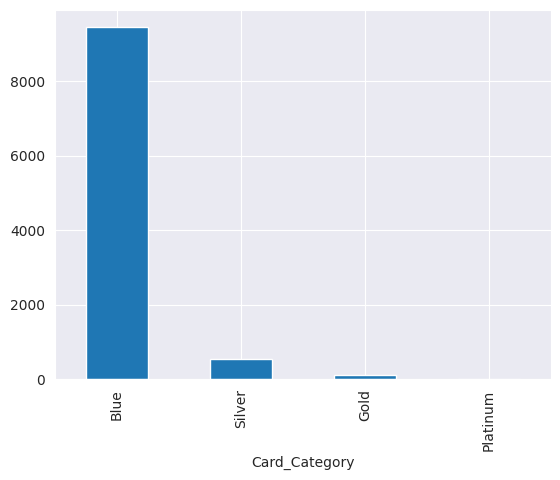

In [48]:
df.Card_Category.value_counts().plot(kind='bar');

#### How many months that Customers are spent?

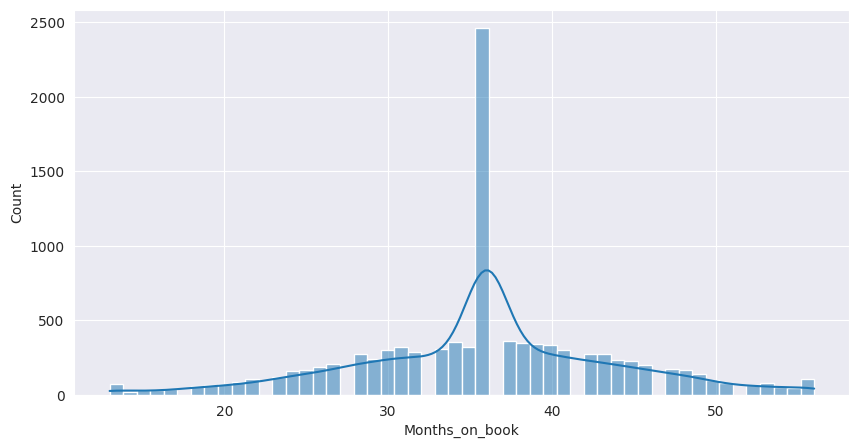

In [49]:
plt.figure(figsize=(10,5))
sns.histplot(x='Months_on_book',data=df,kde=True);

##### **Conclusion :** Customers Churn after 36 months

#### What is total relationship count?

<Axes: xlabel='Total_Relationship_Count'>

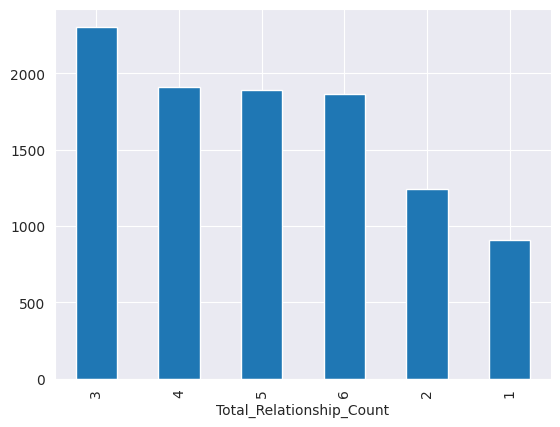

In [50]:
df.Total_Relationship_Count.value_counts().plot(kind='bar')

#### Are Total_Relationship_Count affect on Attrition_Flag?

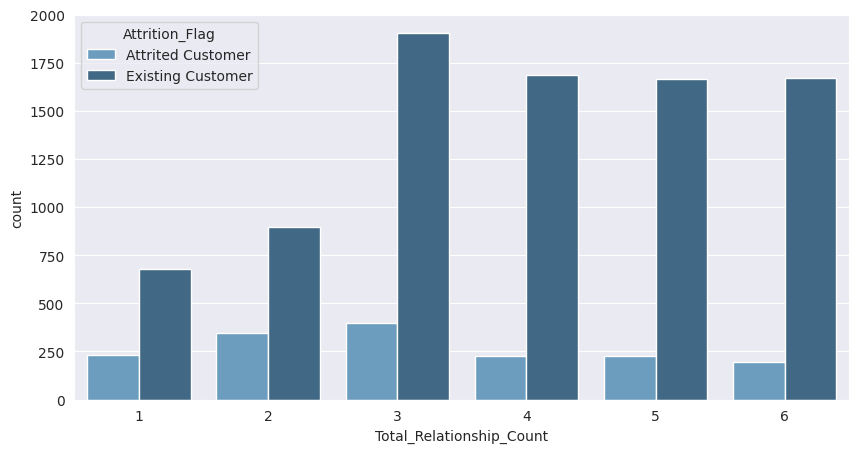

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x='Total_Relationship_Count',data=df,palette='Blues_d',hue='Attrition_Flag');

##### as I expected, customers who voted one and tow are attrited from other

#### Contacts_Count_12_mon VS. Months_Inactive_12_mon

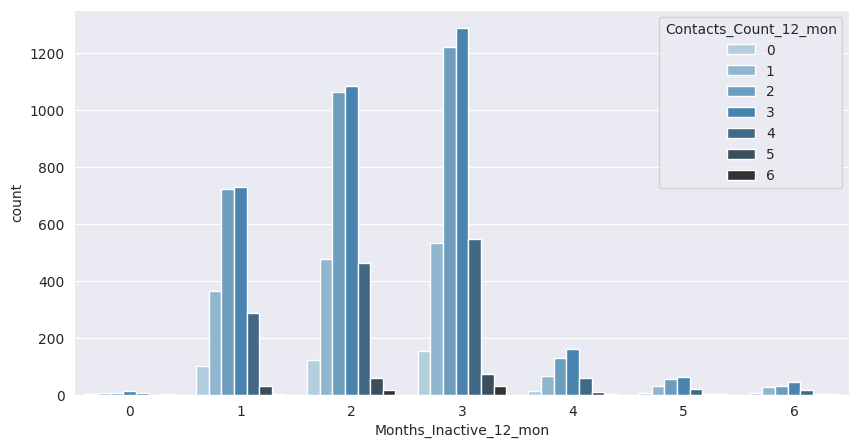

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(x='Months_Inactive_12_mon',data=df,palette='Blues_d',hue='Contacts_Count_12_mon');

##### it is the normal distribution over all months

#### For Checking the Distribution of credit limit of customer

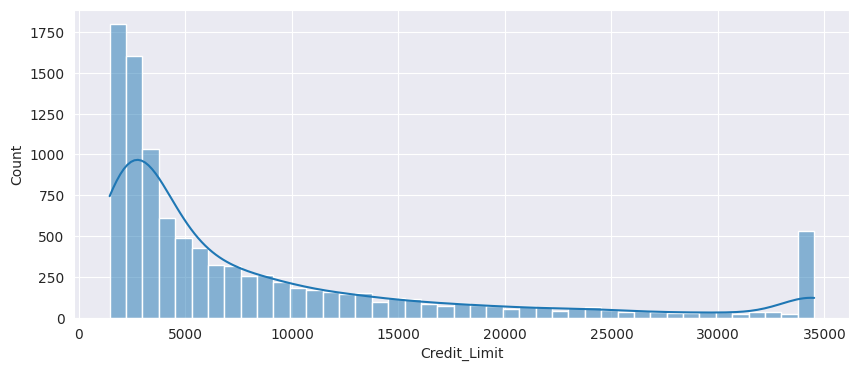

In [53]:
plt.figure(figsize=(10,4))
sns.histplot(x='Credit_Limit',data=df,kde=True);

#### Total amount changed from quarter 4 to quarter 1 VS.  Total count changed from quarter 4 to quarter 1

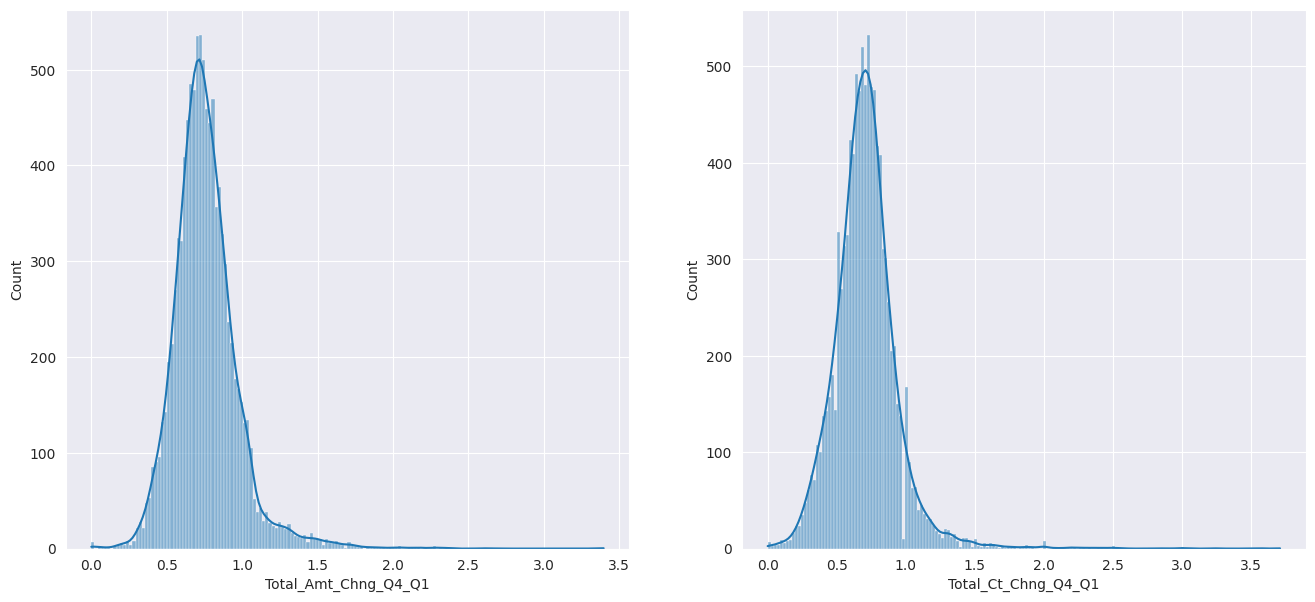

In [54]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,7))
sns.histplot(x='Total_Amt_Chng_Q4_Q1',data=df,kde=True,ax=ax[0])
sns.histplot(x='Total_Ct_Chng_Q4_Q1',data=df,kde=True,ax=ax[1]);

##### it is the normal distribution in two graphs

#### Now, we check Total transaction amount VS Total transaction count

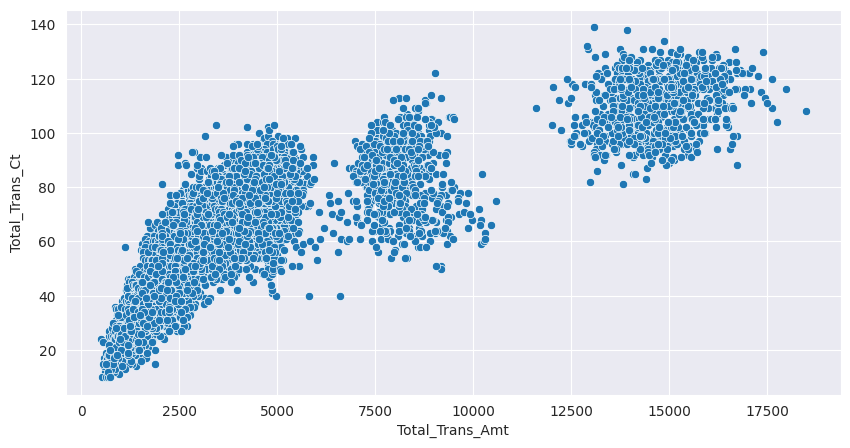

In [55]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Total_Trans_Amt',y='Total_Trans_Ct',data=df);

##### There is a positive correlation between Total_Trans_Amt and Total_Trans_Ct
##### So, we can classify the customers into three segments

#### What is average utilization ratio of customer?

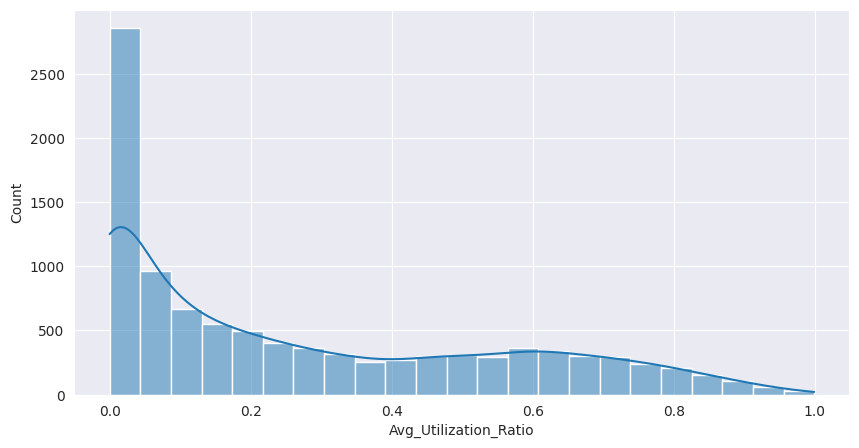

In [56]:
plt.figure(figsize=(10,5))
sns.histplot(x='Avg_Utilization_Ratio',data=df,kde=True);

##### there are more customers we have not utilized from them

#### Now we see the correlation between columns

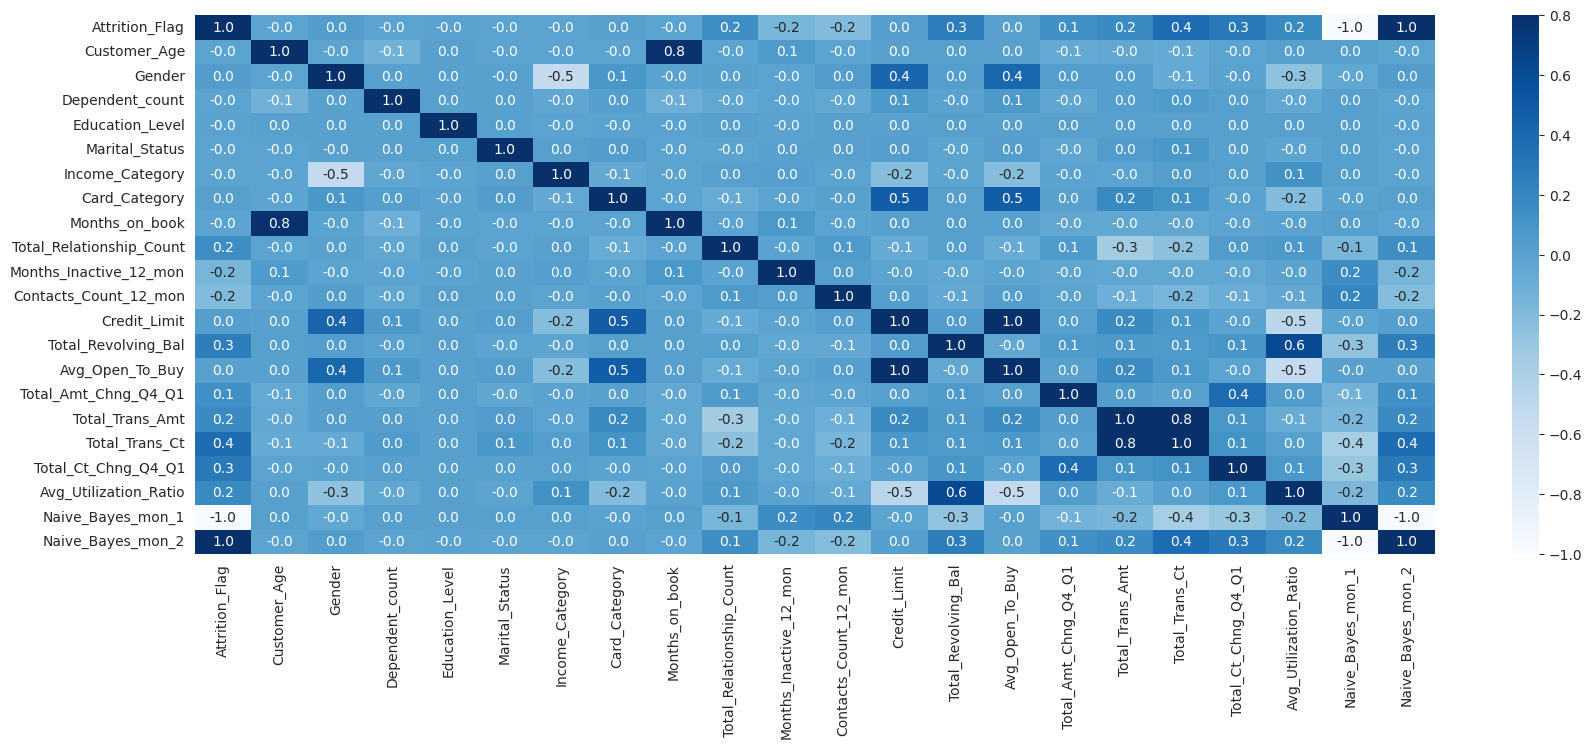

In [72]:
plt.figure(figsize=(20,7))
correlation = df.corr()
sns.heatmap(correlation,vmin=None,
    vmax=0.8,
    cmap='Blues',
    annot=True,
    fmt='.1f',
    linecolor='white',
    cbar=True);


#### Here most of the columns follow the normal distribution so I will use Gaussian naive bayes

# Modeling

In [73]:
#converting columns that have object data to numeric
lis=['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
le=LabelEncoder()
for column in lis:
    df[column]=le.fit_transform(df[column])
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_mon_1,Naive_Bayes_mon_2
0,1,45,1,3,3,1,2,0,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,1,49,0,5,2,2,4,0,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,1,51,1,3,2,1,3,0,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,1,40,0,4,3,3,4,0,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,1,40,1,3,5,1,2,0,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [74]:
X=df.drop(columns=['Attrition_Flag'])
y=df['Attrition_Flag']
X.shape,y.shape

((10127, 21), (10127,))

In [75]:
# I will scall data because it has columns that have big and small values and it will affect on the algorithm
X=StandardScaler().fit_transform(X)
X[:3]

array([[-1.65405580e-01,  1.05995565e+00,  5.03368127e-01,
        -5.26365976e-02, -6.28127573e-01, -5.74181504e-01,
        -2.59473284e-01,  3.84620878e-01,  7.63942609e-01,
        -1.32713603e+00,  4.92403766e-01,  4.46621903e-01,
        -4.73422218e-01,  4.88970818e-01,  2.62349444e+00,
        -9.59706574e-01, -9.73895182e-01,  3.83400260e+00,
        -7.75882235e-01, -4.37753814e-01,  4.37763128e-01],
       [ 3.33570383e-01, -9.43435701e-01,  2.04319867e+00,
        -5.97678339e-01,  7.27305611e-01,  7.55052944e-01,
        -2.59473284e-01,  1.01071482e+00,  1.40730617e+00,
        -1.32713603e+00, -4.11615984e-01, -4.13666521e-02,
        -3.66666822e-01, -8.48598788e-03,  3.56329284e+00,
        -9.16432607e-01, -1.35734038e+00,  1.26085729e+01,
        -6.16275655e-01, -4.37853975e-01,  4.37845257e-01],
       [ 5.83058365e-01,  1.05995565e+00,  5.03368127e-01,
        -5.97678339e-01, -6.28127573e-01,  9.04357198e-02,
        -2.59473284e-01,  8.96451285e-03,  1.20579050e

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=44, shuffle =True)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7088, 21), (3039, 21), (7088,), (3039,))

## Naive Bayes

In [77]:
NV=GaussianNB()
NV.fit(x_train,y_train)
NV.score(x_train,y_train),NV.score(x_test,y_test)

(1.0, 1.0)

### The accuracy is 100% train and test.

In [78]:
y_predict=NV.predict(x_test)
y_predict[:10],y_test[:10]

(array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]),
 1118    1
 7680    1
 9174    1
 1073    1
 463     0
 6857    1
 1368    1
 8649    1
 2282    1
 9817    0
 Name: Attrition_Flag, dtype: int64)

[[ 489    0]
 [   0 2550]]


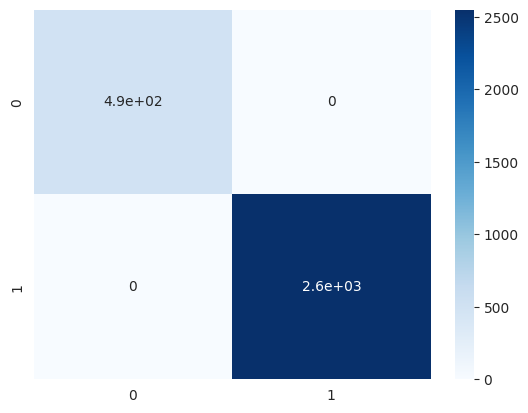

In [79]:
confusion_matrix_model=confusion_matrix(y_test,y_predict)
print(confusion_matrix_model)
sns.heatmap(confusion_matrix_model,annot=True,cmap='Blues');

In [80]:
df_LR = pd.DataFrame(classification_report(y_predict,y_test, digits=2,output_dict=True)).T

df_LR['support'] = df_LR.support.apply(int)

df_LR.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])


,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,489
1,1.000000,1.000000,1.000000,2550
accuracy,1.000000,1.000000,1.000000,1
macro avg,1.000000,1.000000,1.000000,3039
weighted avg,1.000000,1.000000,1.000000,3039


## Logistic Regression

In [81]:
LR=LogisticRegression(penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100
)
LR.fit(x_train,y_train)
LR.score(x_train,y_train),LR.score(x_test,y_test)

(1.0, 1.0)

### Here, Also we get the accuracy is 100% train and test

In [83]:
y_predict=LR.predict(x_test)
y_predict[:10],y_test[:10]

(array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]),
 1118    1
 7680    1
 9174    1
 1073    1
 463     0
 6857    1
 1368    1
 8649    1
 2282    1
 9817    0
 Name: Attrition_Flag, dtype: int64)

[[ 489    0]
 [   0 2550]]


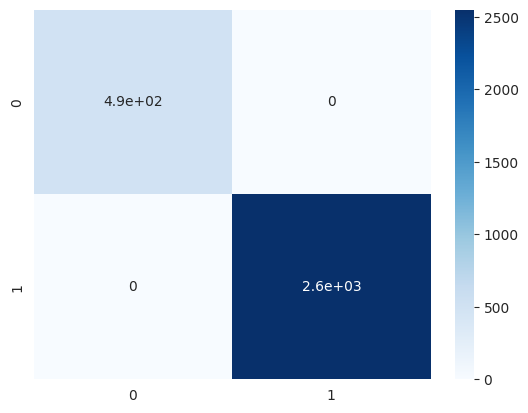

In [84]:
confusion_matrix_model=confusion_matrix(y_test,y_predict)
print(confusion_matrix_model)
sns.heatmap(confusion_matrix_model,annot=True,cmap='Blues');

In [85]:
df_NV = pd.DataFrame(classification_report(y_predict,y_test, digits=2,output_dict=True)).T

df_NV['support'] = df_NV.support.apply(int)

df_NV.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])


,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,489
1,1.000000,1.000000,1.000000,2550
accuracy,1.000000,1.000000,1.000000,1
macro avg,1.000000,1.000000,1.000000,3039
weighted avg,1.000000,1.000000,1.000000,3039
